# Exercícios da Aula 1 - Edmur C. Neto - 12558492

1 - Gere dados a partir de uma distribuição de Poisson. Varie a taxas $\lambda$ no intervalo [1,10] e mostre o gráfico da média em função da variância.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import iqr
from scipy.stats import pearsonr, spearmanr


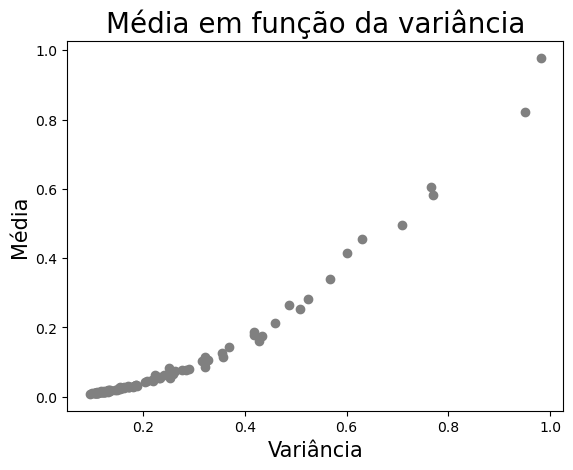

In [2]:
i = 1
media = []
var = []

while i < 10:

    lamb = i
    beta = 1.0/lamb
    X = np.random.exponential(beta, 500)
    media.append(np.mean(X))
    var.append(np.var(X))
    
    i = i + 0.1


plt.scatter(media, var, color="gray")
plt.xlabel("Variância", fontsize=15)
plt.ylabel("Média", fontsize=15)
plt.title("Média em função da variância", fontsize=20)

plt.show()


2 - Considere os dados da Iris. Calcule a média, variância e IQR para cada atributo.

In [3]:
df_iris = pd.read_csv("/home/edmurcn/Documentos/MeusProjetos/Fis._Estat._Comp./Intro._Ciencia_Dados/data/iris.csv")

media = []
variancia = []
IQR = []
nome = []

for i in df_iris.columns[0:df_iris.shape[1]-1]:
    nome.append(i)
    media.append(np.mean(df_iris[i]))
    variancia.append(np.var(df_iris[i]))
    IQR.append(iqr(df_iris[i]))
    
dados = {
    "Colunas": nome,
    "Médias": media,
    "Variâncias": variancia,
    "IQR's": IQR
}

parametros = pd.DataFrame(dados)

parametros.head()
    
        

,Colunas,Médias,Variâncias,IQR's
0,sepal_length,5.843333,0.681122,1.3
1,sepal_width,3.054000,0.186751,0.5
2,petal_length,3.758667,3.092425,3.5
3,petal_width,1.198667,0.578532,1.5


3 - Obtenha o boxplot de todas as variáveis da flor Iris, para cada espécie.

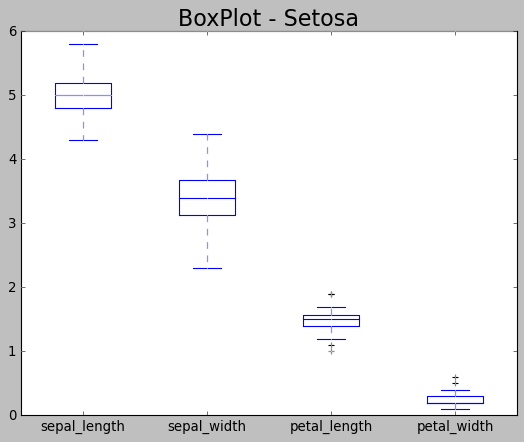

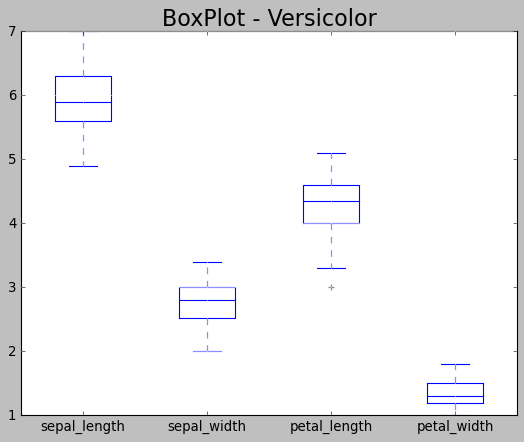

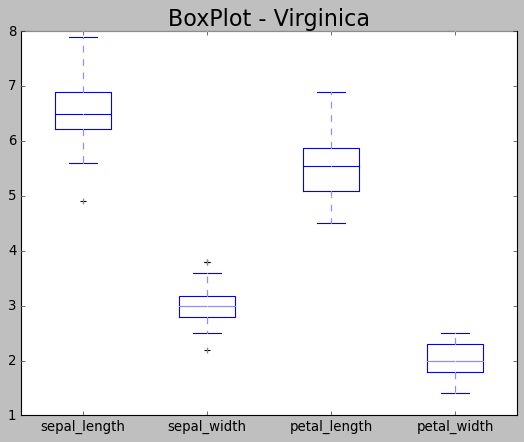

In [4]:
#Separar os dados com base nas espécies

setosa_dados = df_iris[df_iris["species"] == "setosa"]
versicolor_dados = df_iris[df_iris["species"] == "versicolor"]
virginica_dados = df_iris[df_iris["species"] == "virginica"]
atributos = []

for i in df_iris.columns[0:df_iris.shape[1]-1]:
    atributos.append(i)

plt.style.use("classic")
plt.grid(color="w", linestyle = "solid")

plt.subplot(1, 1, 1)
setosa_dados.boxplot(atributos, color="black" )
plt.title("BoxPlot - Setosa",  fontsize = 20)
plt.show()

plt.style.use("classic")
plt.grid(color="w", linestyle = "solid")

plt.subplot(1, 1, 1)
versicolor_dados.boxplot(atributos, color="black")
plt.title("BoxPlot - Versicolor", fontsize = 20)
plt.show()

plt.style.use("classic")
plt.grid(color="w", linestyle = "solid")

plt.subplot(1, 1, 1)
virginica_dados.boxplot(atributos, color="black")
plt.title("BoxPlot - Virginica",  fontsize = 20)
plt.show()




4 - Para a função log(), investigue como as correlações de Pearson e Spearman variam de acordo com o intervalo dos dados.

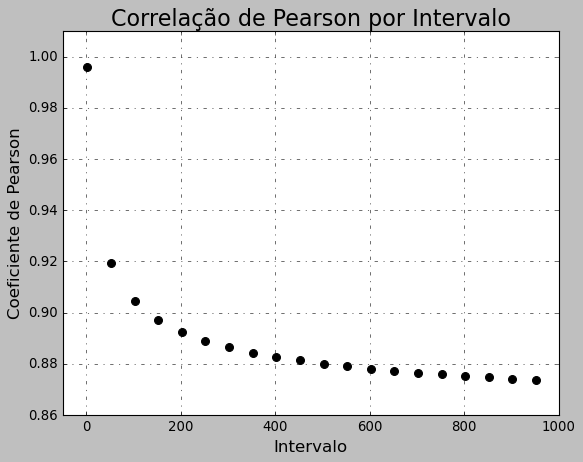

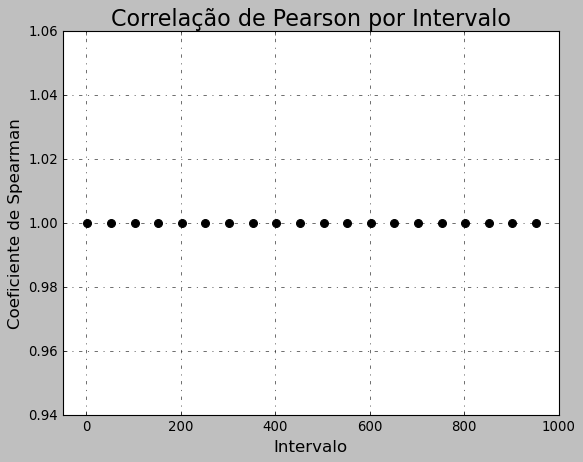

In [5]:
pearson = []
spearman = []
intervalo = []

for i in range(2,1000,50):
    X = np.linspace(1, i, 1000)
    Y = np.log(X)
    corr, p_value = pearsonr(X,Y)
    corrs, s_value = spearmanr(X,Y)
    corr = int(corr*10000)/10000
    corrs = int(corrs*10000)/10000
    pearson.append(corr)
    spearman.append(corrs)
    intervalo.append(i)

plt.grid(color="black", linestyle="dashdot")
plt.scatter(intervalo, pearson, marker="o", s=50, color="black")
plt.title("Correlação de Pearson por Intervalo", fontsize=20)
plt.ylabel("Coeficiente de Pearson", fontsize=15)
plt.xlabel("Intervalo", fontsize=15)
plt.xlim(-50)
plt.ylim(0.86, 1.01)
plt.show()


plt.grid(color="black", linestyle="dashdot")
plt.scatter(intervalo, spearman, marker="o", s=50, color="black", )
plt.title("Correlação de Pearson por Intervalo", fontsize=20)
plt.ylabel("Coeficiente de Spearman", fontsize=15)
plt.xlabel("Intervalo", fontsize=15)
plt.xlim(-50)   
plt.show()


5 - Considere o código acima que mostra como a correlação de Pearson muda com a inclusão de ruídos. Modifique a função para $Y = 0.5*X +$ ruído. Varie o ruído e calcule os coeficientes de Pearson e Spearman, mostrando os respectivos scatterplots com os valores dos coeficientes (como feito no exemplo).

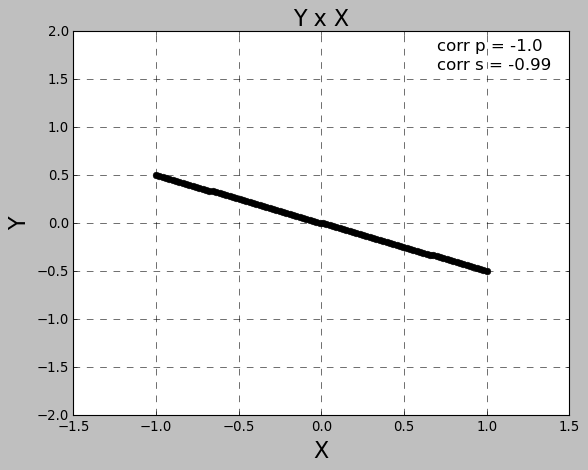

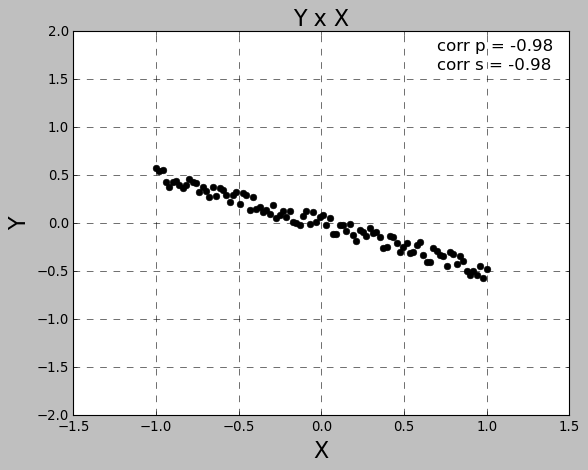

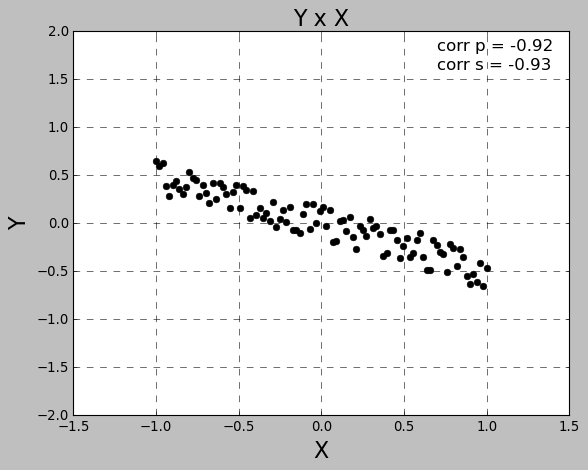

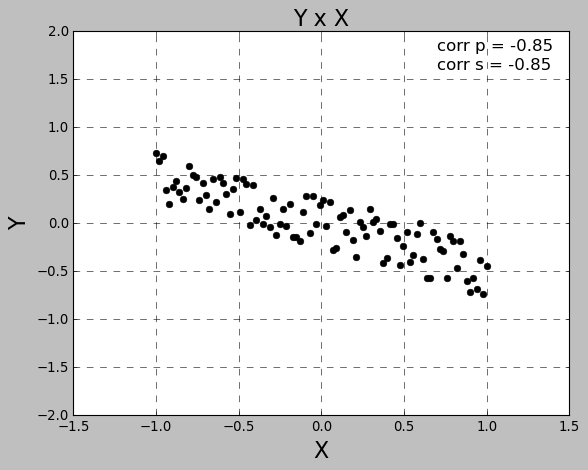

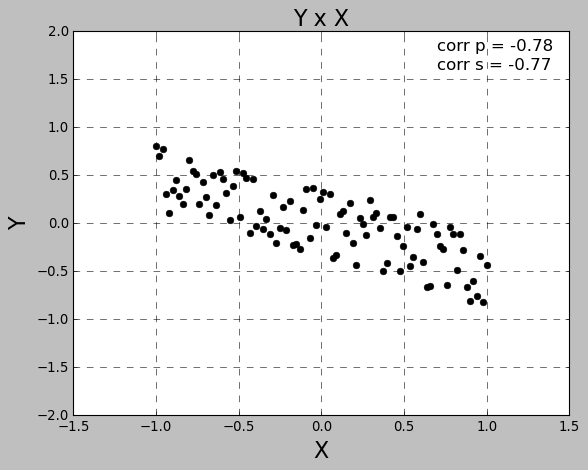

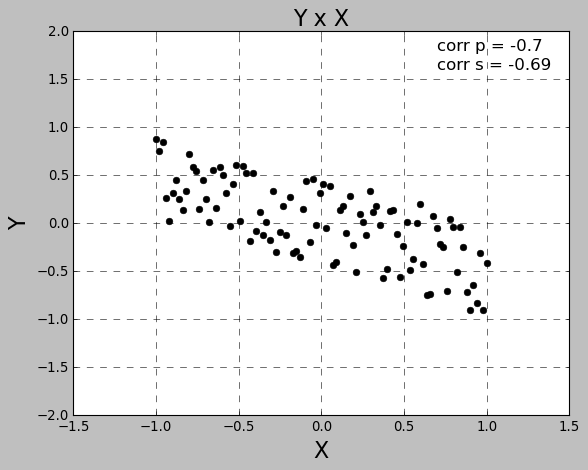

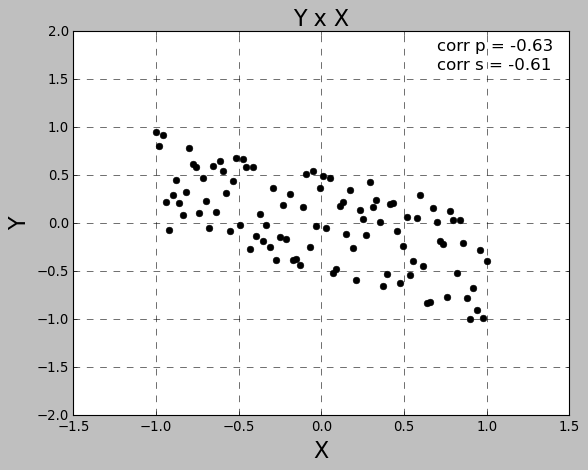

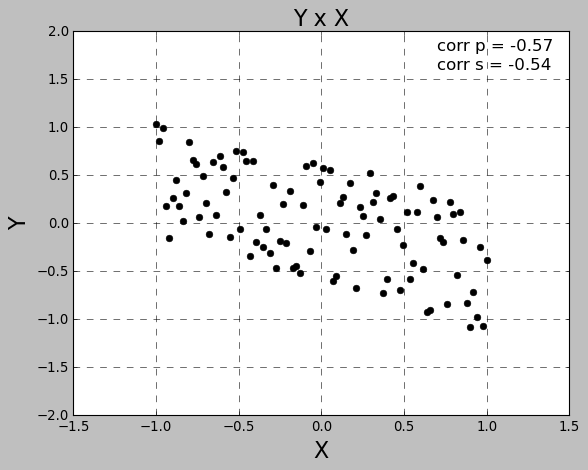

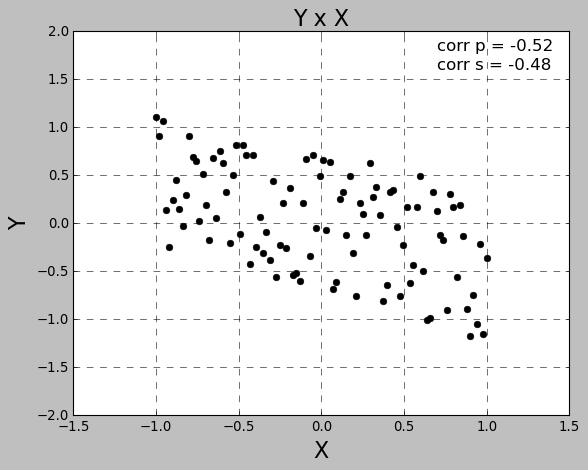

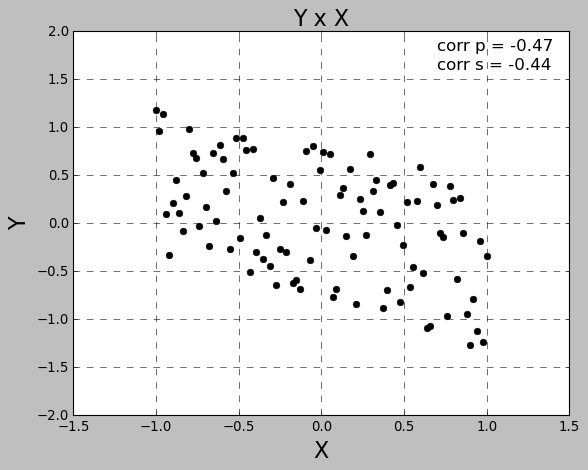

In [6]:
X = np.linspace(-1,1, 100)
erro = np.random.uniform(-1,1,100) # ruído a ser incluído na relação linear.
for sigma in np.arange(0,1,0.1):
    Y = -0.5*X + erro*sigma
    plt.style.use("classic")
    plt.grid(c="black", linestyle="--")
    plt.plot(X,Y, 'o', c="black")
    corr, p_value = pearsonr(X, Y) 
    corrs, p_values = spearmanr(X,Y) 
    corr = int(corr*100)/100
    corrs = int(corrs*100)/100
    string = 'corr p = '+ str(corr)
    string2 = 'corr s = '+ str(corrs)
    plt.xlim(-1.5,1.5)
    plt.ylim(-2, 2)
    plt.title("Y x X", fontsize=20)
    plt.text(0.7,1.8, string, fontsize=15)
    plt.text(0.7, 1.6, string2, fontsize=15)
    plt.xlabel("X", fontsize=20)
    plt.ylabel("Y", fontsize=20)
    plt.show(True)

6- Considere os dados abaixo, chamado quarteto de Ascomb. Calcule a média, variância, correlação de Pearson e Spearman entre as variáveis x e y. O que você pode dizer sobre esses dados?

,Parametros,X,Y1,Y2,Y3,X4,Y4
0,Média,9.0,7.50,7.50,7.50,9.0,7.50
1,Variância,10.0,3.75,3.75,3.74,10.0,3.74


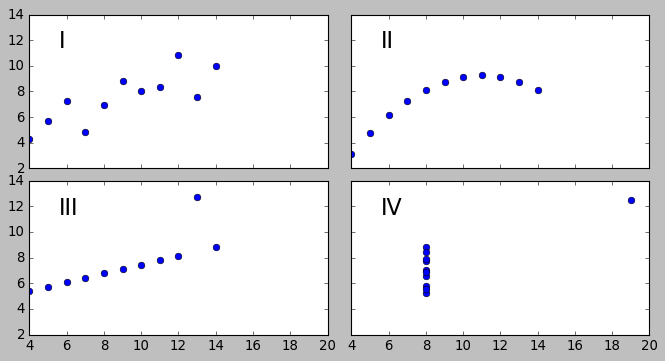

,Coeficientes,I,II,III,IV
0,Pearson,0.81,0.81,0.81,0.81
1,Spearman,0.81,0.69,0.99,0.50


In [38]:

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

count = 0
dados = []
parametros = []
coeficientes = []

dados.append(x)
dados.append(y1)
dados.append(y2)
dados.append(y3)
dados.append(x4)
dados.append(y4)

for i in dados:
    count = count + 1
    parametros.append([int(np.mean(i)*100)/100, int(np.var(i)*100)/100])
    if 1 < count < 5:
        corr, p_value = pearsonr(dados[0], i)
        corrs, p_values = spearmanr(dados[0], i)
        corr = int(corr*100)/100
        corrs = int(corrs*100)/100
        coeficientes.append([corr, corrs])
    elif count > 5:
        corr, p_value = pearsonr(dados[4], dados[5])
        corrs, p_values = spearmanr(dados[4], dados[5])
        corr = int(corr*100)/100
        corrs = int(corrs*100)/100
        coeficientes.append([corr, corrs])

df2 = {
    "Coeficientes": ["Pearson", "Spearman"],
    'I': (coeficientes[0]),
    'II': (coeficientes[1]),
    'III': (coeficientes[2]),
    'IV': (coeficientes[3])
}

ps = pd.DataFrame(df2)

df = {
    "Parametros": ["Média", "Variância"],
    "X": parametros[0],
    "Y1": parametros[1],
    "Y2": parametros[2],
    "Y3": parametros[3], 
    "X4": parametros[4], 
    "Y4": parametros[5]
}

mv = pd.DataFrame(df)
display(mv)

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 5),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')
plt.show()

display(ps)

Podemos observar que os dados "X" possuem a mesma média e variância, assim como os dados "Y", desse modo, o coeficiente de Pearson entre qualquer (X,Y), terá o mesmo valor. Agora, quanto ao coeficiente de Spearson, vemos que ele é alterado conforme escolhemos X e Y, porém, ainda assim não é eficiente para identificar correlações que não são lineares, tais como em II e IV. 